In [1]:
## imports
import pandas as pd
import numpy as np

## import the plotnine package
## make sure it's installed
## if not installed, can use
## ! pip install plotnine
import plotnine
from plotnine import *


## print multiple things from same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# A few plot types

## Load DC crime data

In [2]:
## load data on 2020 crimes in DC
dc_crim_2020 = pd.read_csv("https://opendata.arcgis.com/datasets/f516e0dd7b614b088ad781b0c4002331_2.csv")
dc_crim_2020.head()


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.018733,38.886047,20025127,2020/02/11 01:10:52+00,EVENING,OTHERS,THEFT F/AUTO,400 - 599 BLOCK OF C STREET SW,398374.91,135355.71,...,010202 1,10202.0,Precinct 142,38.886039,-77.018731,SOUTHWEST,2020/02/09 22:00:28+00,2020/02/10 17:00:37+00,212335625,NaN
1,-77.076770,38.942697,20025148,2020/02/11 01:51:51+00,EVENING,OTHERS,THEFT/OTHER,4100 - 4199 BLOCK OF WISCONSIN AVENUE NW,393344.88,141646.95,...,001200 4,1200.0,Precinct 33,38.942689,-77.076767,NaN,2020/02/11 00:55:20+00,2020/02/11 01:27:02+00,212335626,NaN
2,-76.981139,38.836953,20025161,2020/02/11 11:40:32+00,MIDNIGHT,OTHERS,THEFT/OTHER,1300 - 1899 BLOCK OF SOUTHERN AVENUE SE,401637.70,129905.89,...,007304 4,7304.0,Precinct 121,38.836945,-76.981137,NaN,2020/02/10 22:00:16+00,2020/02/10 23:00:09+00,212335627,NaN
3,-77.087439,38.954713,20025183,2020/02/11 02:57:57+00,EVENING,OTHERS,THEFT F/AUTO,4400 - 4499 BLOCK OF FESSENDEN STREET NW,392421.20,142981.64,...,001004 1,1004.0,Precinct 31,38.954705,-77.087437,NaN,2020/02/10 14:00:29+00,2020/02/10 23:20:34+00,212335628,NaN
4,-76.976141,38.848144,20025194,2020/02/11 04:35:30+00,MIDNIGHT,GUN,ASSAULT W/DANGEROUS WEAPON,1900 - 2199 BLOCK OF SAVANNAH TERRACE SE,402071.30,131148.35,...,007403 1,7403.0,Precinct 116,38.848137,-76.976139,NaN,2020/02/11 01:57:52+00,NaN,212335629,NaN


## Plot type one: bar plot

**Goal**: bar plot where x axis is what shift it is; y axis is the count of unique crime reports (using `OBJECT_ID` as unique indicator)

In [4]:
## step one: create the summary we want to plot
count_byshift = pd.DataFrame(dc_crim_2020.groupby('SHIFT')['OBJECTID'].nunique()).reset_index()
count_byshift


,SHIFT,OBJECTID
0,DAY,10091
1,EVENING,12312
2,MIDNIGHT,5509


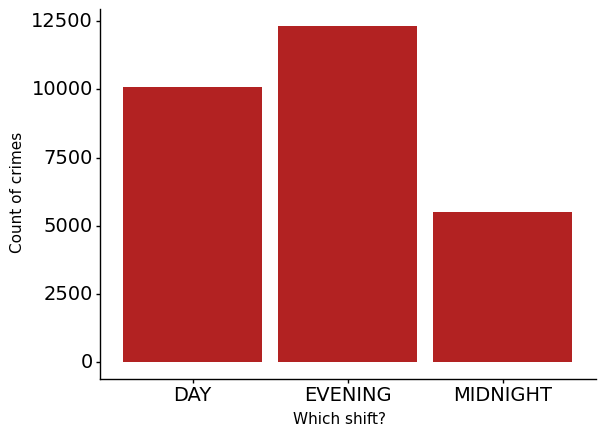

<ggplot: (8768303069648)>

In [5]:

## one way: plot and display in notebook
(ggplot(count_byshift, aes(x = 'SHIFT', 
    y = 'OBJECTID')) + # base layer with data and x and y axis 
    geom_bar(stat = "identity", fill = "firebrick") + # telling it to expect a bar chart; identity
    # arg just means to use the y value 
    theme_classic() + # aesthetics
    xlab("Which shift?") + # custom label for x axis
    ylab("Count of crimes") + # custom label for y axis
    theme(axis_text = element_text(size = 14, color = "black"))) # make font bigger


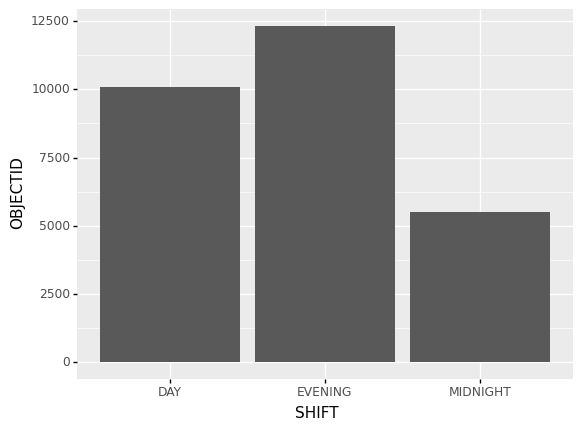

<ggplot: (8768303627439)>

In [6]:

## another way: save to png- right now,
## it's writing to same path our df is stored in; 
plot_shifts = (ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) +
            geom_bar(stat = "identity", fill = "firebrick") +
            theme_classic() +
            xlab("Which shift?") +
            ylab("Count of crimes") +
            theme(axis_text = element_text(size = 14, color = "black")))
plot_shifts.save("plot_shifts.png", 
                width = 12,
                height = 8,
                verbose = False)


## what happens if we don't specify theme or color of bars? diff aesthetics
## also doesnt give us informative x and y labels (for pset please give 
## informative labels)
(ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) +
            geom_bar(stat = "identity"))

## Plot type two: line graph

**Goal**: bar plot where x axis is month; y axis is the count of unique crime reports (using `OBJECT_ID` as unique indicator); want line graph to be able to see trends over time in count of reported crimes

In [7]:
## group by month and find unique reports
### first, extract month from report_dat (just 
### with the noncleaned version)

dc_crim_2020['report_month'] = pd.to_datetime(dc_crim_2020.REPORT_DAT,
                                             errors = "coerce").dt.month
### double check this worked
dc_crim_2020[["REPORT_DAT", "report_month"]].sample(n = 3)

### then, group by month and find unique reports; same syntax as above
### just a diff grouping variable 
count_bymonth = pd.DataFrame(dc_crim_2020.groupby('report_month')['OBJECTID'].nunique()).reset_index()
count_bymonth


,REPORT_DAT,report_month
27273,2020/07/14 00:00:53+00,7
21121,2020/09/11 02:53:50+00,9
809,2020/03/16 14:25:29+00,3


,report_month,OBJECTID
0,1,2948
1,2,2536
2,3,2199
3,4,1652
4,5,1832
5,6,2275
6,7,2133
7,8,2432
8,9,2571
9,10,2560


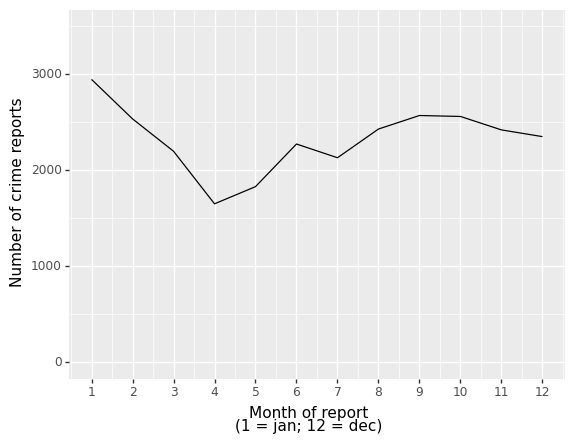

<ggplot: (8790733814212)>

In [7]:

### finally, plot result as line graph
### nearly identical syntax to above
### but uses month as the xaxis rather than
### police shift and geom_line()
### rather than geom_bar()

(ggplot(count_bymonth, aes(x = 'report_month', 
            y = 'OBJECTID')) + # base layer with x and y variables
            geom_line() + # plotting a line
            ylim(0, 3500) + # customizing axis limits (preferred to start at 0)
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            scale_x_continuous(breaks = np.arange(1, 13)))

## Making more complex: visualizing by group

What if we want to create the above line graph but visualize separately for each ward?

Can group by two variables and use the facet_wrap command

### Prelim step: get the input data ready

In [10]:
### add ward as grouping var
count_bymonth_byw = pd.DataFrame(dc_crim_2020.groupby(['report_month',
                        'WARD'])['OBJECTID'].nunique()).reset_index()
count_bymonth_byw.head()
count_bymonth_byw.tail()

## make the facetting var prettier 
## by noting "Ward" before the
count_bymonth_byw['WARD_name'] = 'Ward: ' + count_bymonth_byw.WARD.astype(str)

,report_month,WARD,OBJECTID
0,1,1,369
1,1,2,654
2,1,3,222
3,1,4,313
4,1,5,456


,report_month,WARD,OBJECTID
91,12,4,253
92,12,5,380
93,12,6,305
94,12,7,343
95,12,8,278


### Approach one: separate facet for each group

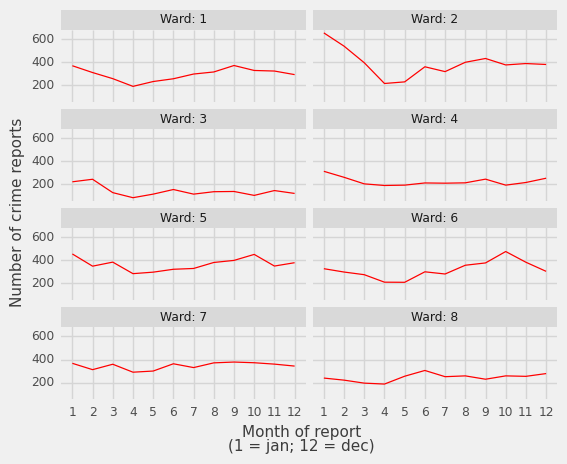

<ggplot: (8768303278023)>

In [11]:
### same syntax as above graph but adding the facet_wrap
### to create a separate subplot for each ward
(ggplot(count_bymonth_byw, aes(x = 'report_month', 
            y = 'OBJECTID')) +
            geom_line(color = "red") +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            facet_wrap('WARD_name', ncol = 2) + # ADDITIONAL LINE 
            scale_x_continuous(breaks = np.arange(1, 13)) +
            theme_538() # using 538 theme 
            ) 

### Approach two: use the group and color commands to get separate shading by group

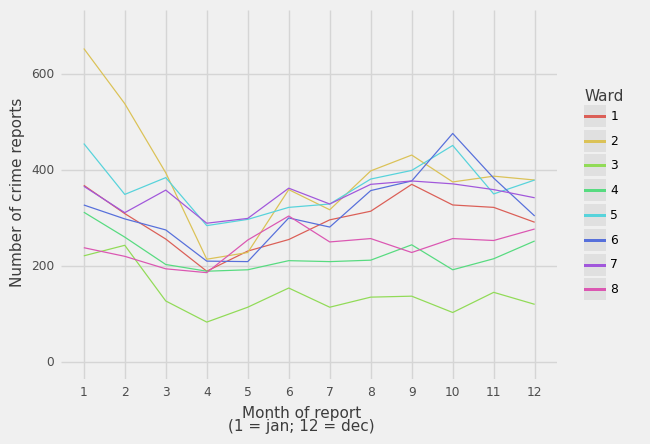

<ggplot: (8768304155456)>

In [12]:
### instead of facet_wrap, one graph but diff colors
(ggplot(count_bymonth_byw, aes(x = 'report_month', 
            y = 'OBJECTID', group = 'factor(WARD)', color = 'factor(WARD)')) +
            geom_line() +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            scale_x_continuous(breaks = np.arange(1, 13)) +
            theme_538() + 
             labs(color = "Ward") +
             ylim(0, 700)
            ) 